<a href="https://colab.research.google.com/github/davidxu90/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [1]:
def mean(l):
  total = 0
  for num in l:
    total += num
  return total / len(l)

def variance(l):
  da_mean = mean(l)
  total = 0
  for num in l:
    total += (num - da_mean) ** 2
  return total / (len(l) - 1)

def stdev(l):
  return variance(l) ** 0.5

In [2]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

print(mean(sales))
print(variance(sales))
print(stdev(sales))

3052.714285714286
214387.90476190473
463.0204150595357


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [21]:
import numpy as np
import pandas as pd

customers = [127, 80, 105, 92, 120, 115, 93]

df = pd.DataFrame({'sales' : sales, 'customers' : customers})
df.cov()

,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [19]:
import statistics

std_sales = statistics.stdev(df['sales'])
std_customers = statistics.stdev(df['customers'])

df.cov() / std_sales / std_customers

# Since the main diagonal of the variance-covariance matrix contains variance values rather than covariance values,
# dividing it by the product of both standard deviations will not return anything meaningful. We want to pay attention
# to the remaining values instead.

,sales,customers
sales,27.144959,0.962834
customers,0.962834,0.036839


In [22]:
df.corr()

,sales,customers
sales,1.000000,0.962834
customers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [40]:
df2 = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv")

df2.shape

(1310, 16)

In [41]:
df3 = df2.select_dtypes(include = np.number)

df3.shape

(1310, 9)

In [42]:
df3.isnull().sum()

# No idea what the 'body' column is, but there are so many NaN values that if I dropped them I would be dropping the majority
# of the rows from the dataset.

Unnamed: 0             0
pclass                 1
survived               1
age                    0
sibsp                  1
parch                  1
fare                   2
body                1189
has_cabin_number       0
dtype: int64

In [43]:
df3.drop('body', 1, inplace = True)

df3.isnull().sum()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Unnamed: 0          0
pclass              1
survived            1
age                 0
sibsp               1
parch               1
fare                2
has_cabin_number    0
dtype: int64

In [44]:
df3.dropna(inplace = True)

df3.isnull().sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Unnamed: 0          0
pclass              0
survived            0
age                 0
sibsp               0
parch               0
fare                0
has_cabin_number    0
dtype: int64

In [45]:
df3.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,has_cabin_number
Unnamed: 0,142758.852129,284.266312,-53.841414,-1458.534777,26.066613,1.342019,-9410.735123,-95.373542
pclass,284.266312,0.702126,-0.127139,-3.974162,0.053400,0.013505,-24.227788,-0.250062
survived,-53.841414,-0.127139,0.236319,-0.305629,-0.014245,0.034690,6.146023,0.061387
age,-1458.534777,-3.974162,-0.305629,165.385957,-2.550069,-1.451467,114.416613,1.470661
sibsp,26.066613,0.053400,-0.014245,-2.550069,1.085692,0.336944,8.641768,-0.004036
parch,1.342019,0.013505,0.034690,-1.451467,0.336944,0.749654,9.928031,0.013260
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,10.976961
has_cabin_number,-95.373542,-0.250062,0.061387,1.470661,-0.004036,0.013260,10.976961,0.174803


In [46]:
df3.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,has_cabin_number
Unnamed: 0,1.000000,0.897876,-0.293134,-0.300169,0.066211,0.004102,-0.481215,-0.603743
pclass,0.897876,1.000000,-0.312122,-0.368798,0.061162,0.018615,-0.558629,-0.713783
survived,-0.293134,-0.312122,1.000000,-0.048887,-0.028122,0.082418,0.244265,0.302031
age,-0.300169,-0.368798,-0.048887,1.000000,-0.190305,-0.130355,0.171892,0.273520
sibsp,0.066211,0.061162,-0.028122,-0.190305,1.000000,0.373485,0.160238,-0.009264
parch,0.004102,0.018615,0.082418,-0.130355,0.373485,1.000000,0.221539,0.036629
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,0.507253
has_cabin_number,-0.603743,-0.713783,0.302031,0.273520,-0.009264,0.036629,0.507253,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

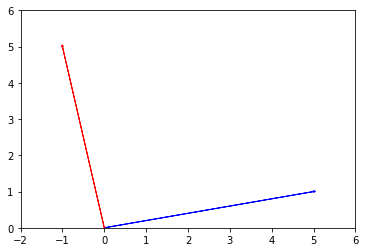

In [57]:
# Orthogonal means the vectors in question are perpendicular.

import matplotlib.pyplot as plt

a = [5, 1]
b = [-1, 5]

plt.arrow(0, 0, a[0], a[1], head_width=.05, head_length=0.05, color='blue')
plt.arrow(0, 0, b[0], b[1], head_width=.05, head_length=0.05, color='red')
plt.xlim(-2, 6)
plt.ylim(0, 6)
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [54]:
a = [-5, 3, 7]
b = [6, -8, 2]

np.dot(a, b)

# Since the dot product is nonzero, the vectors in question are not orthogonal.

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [5]:
import numpy as np

c = np.array([2, -15, 6, 20])

print(np.linalg.norm(c) ** 2)
print(np.dot(c, c))
print(np.matmul(c.T, c))

665.0
665
665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [55]:
f = [4, 12, 11, 9, 2]

f / np.linalg.norm(f)

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

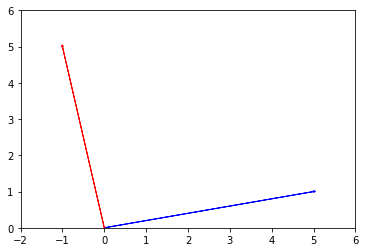

In [59]:
v1 = [5, 1]
v2 = [-1, 5]

plt.arrow(0, 0, v1[0], v1[1], head_width=.05, head_length=0.05, color='blue')
plt.arrow(0, 0, v2[0], v2[1], head_width=.05, head_length=0.05, color='red')
plt.xlim(-2, 6)
plt.ylim(0, 6)
plt.show()

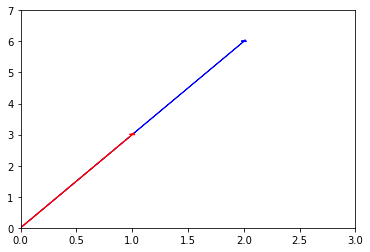

In [63]:
v3 = [2, 6]
v4 = [1, 3]

plt.arrow(0, 0, v3[0], v3[1], head_width=.05, head_length=0.05, color='blue')
plt.arrow(0, 0, v4[0], v4[1], head_width=.05, head_length=0.05, color='red')
plt.xlim(0, 3)
plt.ylim(0, 7)
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

The span of these two vectors is $\mathbb{R}$, since the two vectors are not linearly independent (${h} = 4{g}$).

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [65]:
lmn = [[1, 2, 3],
       [-1, 0, 7],
       [4, 8, 2]]

np.linalg.matrix_rank(lmn)

# Since the matrix with l, m, n as its rows has a rank of 3, we can conclude that l, m, n span the space R^3.

3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



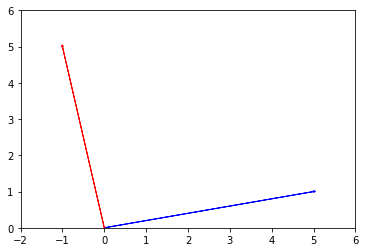

In [66]:
v1 = [5, 1]
v2 = [-1, 5]

plt.arrow(0, 0, v1[0], v1[1], head_width=.05, head_length=0.05, color='blue')
plt.arrow(0, 0, v2[0], v2[1], head_width=.05, head_length=0.05, color='red')
plt.xlim(-2, 6)
plt.ylim(0, 6)
plt.show()

## 6.2 What does it mean to form a basis?

It simply means that the vectors in question are (a) linearly independent, and (b) span the entire space.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [67]:
P = [[1, 2, 3],
     [-1, 0, 7],
     [4, 8, 2]]

np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

It tells us the size of the vector space that the columns of the matrix span. (Also, the rows of the matrix will always have the same span, so one can find the rank either of the matrix or of its transpose without worrying about getting a different answer.)

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


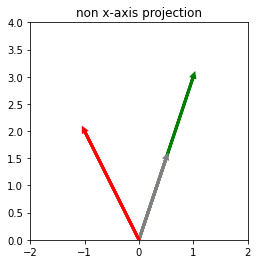

In [83]:
plt.xlim(-2, 2)          
plt.ylim(0, 4)

v = [1, 3]
w = [-1, 2]
proj = np.multiply(np.dot(v, w) / np.linalg.norm(v) ** 2, v)

axes = plt.gca()
plt.axes().set_aspect('equal')

plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.05, head_length=0.05, color ='gray')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("non x-axis projection")
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

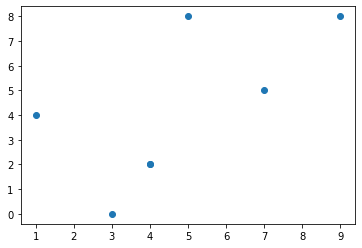

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()